Customer Churn Prediction

Milestone # 1
----------------------
DATA PRE-PROCESSING
----------------------

Importing Libraries

In [50]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
warnings.simplefilter(action='ignore')

Pre-Processing

In [6]:
cc_data = pd.read_csv(r'./ccp.csv')
cc_data_cp = cc_data.copy()

In [7]:
cc_data_cp.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
cc_data_cp.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
cc_data_cp.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
cc_data.fillna(0,inplace=True)
cc_data_cp.fillna(0, inplace=True)

In [16]:
cc_data_cp.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
cc_data_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Visualisation

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

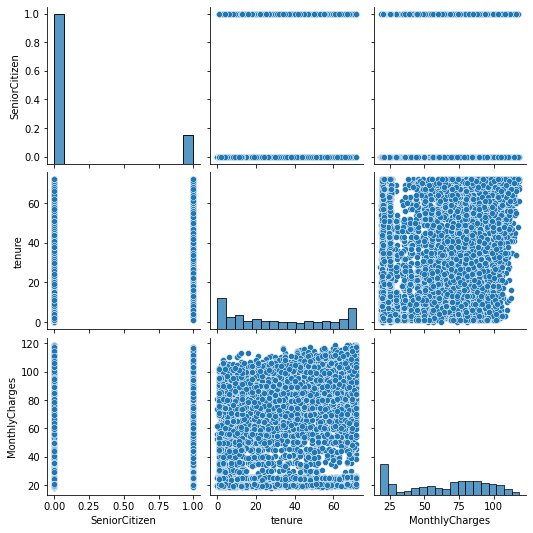

In [28]:
sns.pairplot(data=cc_data_cp)

In [35]:
cc_data_cp['TotalCharges'] = cc_data_cp['TotalCharges'].replace('', 0)
cc_data_cp['TotalCharges'] = cc_data_cp['TotalCharges'].astype(float)

In [37]:
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()

cc_data_cp[columns_to_scale] = scaler.fit_transform(cc_data_cp[columns_to_scale])

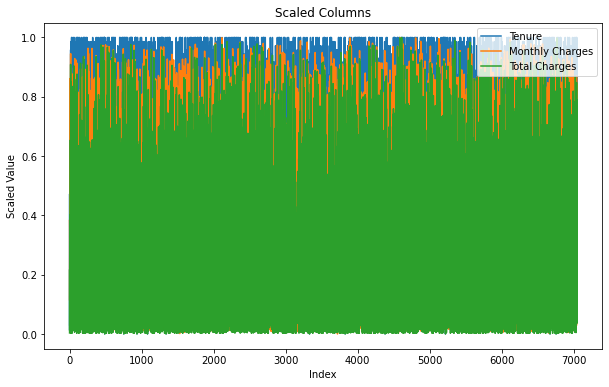

In [39]:
cc_data_cp[columns_to_scale] = (cc_data_cp[columns_to_scale] - cc_data_cp[columns_to_scale].min()) / (cc_data_cp[columns_to_scale].max() - cc_data_cp[columns_to_scale].min())

plt.figure(figsize=(10, 6))
plt.plot(cc_data_cp['tenure'], label='Tenure')
plt.plot(cc_data_cp['MonthlyCharges'], label='Monthly Charges')
plt.plot(cc_data_cp['TotalCharges'], label='Total Charges')
plt.xlabel('Index')
plt.ylabel('Scaled Value')
plt.title('Scaled Columns')
plt.legend()
plt.show()

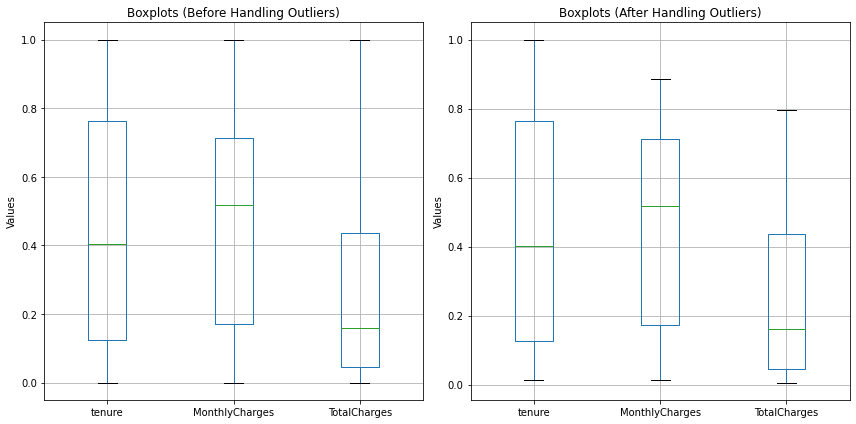

In [43]:
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
z_scores = np.abs((cc_data_cp[numeric_columns] - cc_data_cp[numeric_columns].mean()) / cc_data_cp[numeric_columns].std())
winsorized_df = cc_data_cp.copy()
winsorized_df[numeric_columns] = winsorized_df[numeric_columns].apply(lambda x: x.clip(lower=x.quantile(0.05), upper=x.quantile(0.95)))
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
cc_data_cp[numeric_columns].boxplot()
plt.title('Boxplots (Before Handling Outliers)')
plt.ylabel('Values')

plt.subplot(1, 2, 2)
winsorized_df[numeric_columns].boxplot()
plt.title('Boxplots (After Handling Outliers)')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

In [44]:
cc_data_cp.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,0.013889,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,0.003437,No
1,5575-GNVDE,Male,0,No,No,0.472222,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,0.385075,0.217564,No
2,3668-QPYBK,Male,0,No,No,0.027778,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,0.012453,Yes
3,7795-CFOCW,Male,0,No,No,0.625000,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.239303,0.211951,No
4,9237-HQITU,Female,0,No,No,0.027778,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,0.017462,Yes


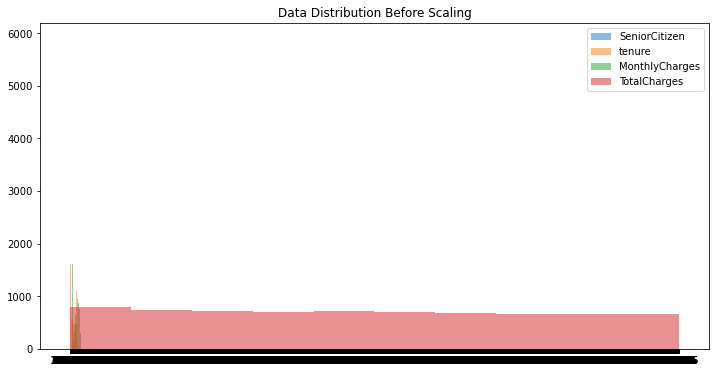

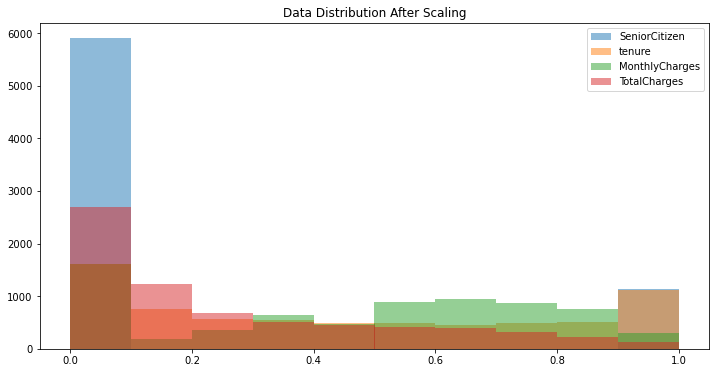

In [47]:
numeric_columns = cc_data_cp.select_dtypes(include=['int64', 'float64']).columns

if 'Churn' in numeric_columns:
    numeric_columns = numeric_columns.drop('Churn')

df_copy = cc_data.copy()

plt.figure(figsize=(12, 6))
for column in numeric_columns:
    plt.hist(df_copy[column], alpha=0.5, label=column)
plt.title('Data Distribution Before Scaling')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for column in numeric_columns:
    plt.hist(cc_data_cp[column], alpha=0.5, label=column)
plt.title('Data Distribution After Scaling')
plt.legend()
plt.show()

In [48]:
columns_to_encode = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                     'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

cc_data_cp[columns_to_encode] = cc_data_cp[columns_to_encode].astype('category')

print(cc_data_cp.dtypes)

customerID            object
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure               float64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object


In [49]:
cc_data_cp = cc_data_cp.drop("customerID", axis=1)

In [51]:
label_encoder = LabelEncoder()

for column in columns_to_encode:
    cc_data_cp[column] = label_encoder.fit_transform(cc_data_cp[column])

print(cc_data_cp.head())

   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0  0.013889             0   
1       1              0        0           0  0.472222             1   
2       1              0        0           0  0.027778             1   
3       1              0        0           0  0.625000             0   
4       0              0        0           0  0.027778             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1     

In [53]:
cc_data_cp['Churn'] = label_encoder.fit_transform(cc_data_cp['Churn'])

In [54]:
cc_data_cp.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.003437,0
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.217564,0
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.012453,1
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.211951,0
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.017462,1


In [55]:
cc_data_cp.to_csv('cleaned-data.csv',index=False)